> **Tip**: Welcome to the Investigate a Dataset project! 

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this data analysis, we will be working with a dataset that contains information on various movies, including their id, IMDB id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year, budget adjusted, and revenue adjusted. We will explore the data to gain a better understanding of the characteristics and trends of these movies and to identify any patterns or relationships that may be present. By analyzing this data, we hope to gain insights into the movie industry and to better understand the factors that influence the success of a film.
>
>Here are my data analysis questions that could be answered using the provided dataset:

>1.movies that made the greatest and least money

>2.greatest and smallest budgeted films

>3.movies with the highest and lowest revenue.

>4.movies with the longest runtimes and the shortest runtimes

>5.The average length of each film

>6.Which year saw the most number of successful movies?

>7.Popular genres (with respest to the profitable movies).

>8.most popular cast (with respest to the profitable movies)

>9.average spending (with respest to the profitable movies)

>10.average income (with respest to the profitable movies)

>11.The average running time of the film (with respest to the profitable movies)

In [333]:
# Import packages

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline




UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

>: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.We would Make sure that we document the steps carefully and justify the cleaning decisions.

### General Properties

In [334]:


#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Obsevations from the data set

1. The dataset does not indicate any currency units. Due to the fact that the dollar is the most widely used international currency, I shall utilize it in my analysis.

2. Because each movie's vote count is different, we cannot determine a movie's popularity based just on its average vote count.

### Data Cleaning (Removing the unused information from the dataset )
 Important observation regarding this process

>1. Unused columns like id, imdb id, vote count, production company, keywords, homepage, etc. need to be removed.

>2. Eliminating duplicate rows (if any).


>3. We will remove records for certain movies from the database that have no budget or no income because their value has not been recorded.

>4. Formatting the release date field as a date.
>5. Substituting NAN for zero in the runtime column.

>6. The budget and revenue column's format is changing.

1. Eliminating unused columns

Id, imdb id, popularity, budget adj, revenue adj, homepage, keywords, overview, production companies, vote count, and vote average are the columns that need to be removed.

In [335]:
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(4)

C:\Users\HP\AppData\Local\Temp\ipykernel_13748\3866101205.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmdb_data= tmdb_data.drop(del_col,1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015


2. Eliminating duplicate rows (if any)

Lets see how many entries we have in the database

In [336]:
rows, col = tmdb_data.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 10 no.of columns in it.


Now removing the duplicate rows if any!

In [337]:
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 10 no.of columns in it.


Definitely there was a duplicate row and it has been removed now

3.  Removing 0's from budget and the revenue columns

In [338]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))


So after removing such entries, we now have only 3853 no.of movies.


4. Formatting the release date field as a date.



In [339]:
# printing the changed dataset
tmdb_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


5. Substituting NAN for zero in the runtime column.

In [340]:

#replacing 0 with NaN of runtime column in the dataset
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

6. The budget and revenue column's format is changing.

In [341]:
#printing the data type of the data set
tmdb_data.dtypes


budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [342]:
change_type=['budget', 'revenue']
#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
#printing the changed information
tmdb_data.dtypes


budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

 Calculating the profit of the each movie

In [343]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
tmdb_data.insert(2,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])

#previewing the changes in the dataset
tmdb_data.head(2)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


<a id='eda'></a>
## Exploratory Data Analysis

> To explore the data and address the research questions, we can use a variety of statistical and visualization techniques. Here are some examples of how you might proceed:

### Research Question  (movies that made the greatest and least money)

In [344]:


import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,12/10/09,12/2/10


Column with id 1386 shows the highest earned profit i.e 2544505847 .

Whereas the column with id 2244 shows the lowest earned profit i.e -413912431

### Research Question 2 : greatest and smallest budgeted films


In [345]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,12/2/10,4/23/99


Column with id 1386 shows the highest earned profit i.e 2544505847 .

Whereas the column with id 2244 shows the lowest earned profit i.e -413912431

### Research Question 3 : movies with the highest and lowest revenue.

In [346]:
# we will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,12/10/09,11/14/03


Column with id 1386 shows the largest revenue earned i.e 2781505847 dollar.

Whereas the column with id 5067 shows the smallest revenue earned i.e 2 dollar

### Research Question 4 : movies with the longest runtimes and the shortest runtimes



In [347]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,5/19/10,6/2/03


Column with id 2107 shows the longest runtime i.e 338 minutes.

Whereas the column with id 5162 shows the shortest runtime i.e 15 minutes

### Research Question 5 : Average runtime of the movies

In [348]:
# defining a function to find average of a column
def avg_fun(column):
    return tmdb_data[column].mean()

In [349]:
#calling above function
avg_fun('runtime')

109.22029060716139

So the average runtime a movie is 109 minutes. Lets analyse it in a visual form i.e. by graphical approach.

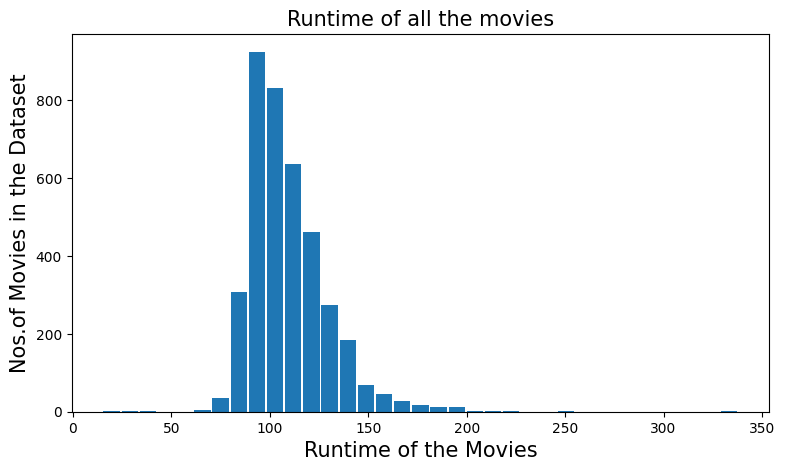

In [350]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

Lets analyse more about runtime of the movie using different kind of plots i.e Box Plot and Data Point Plot

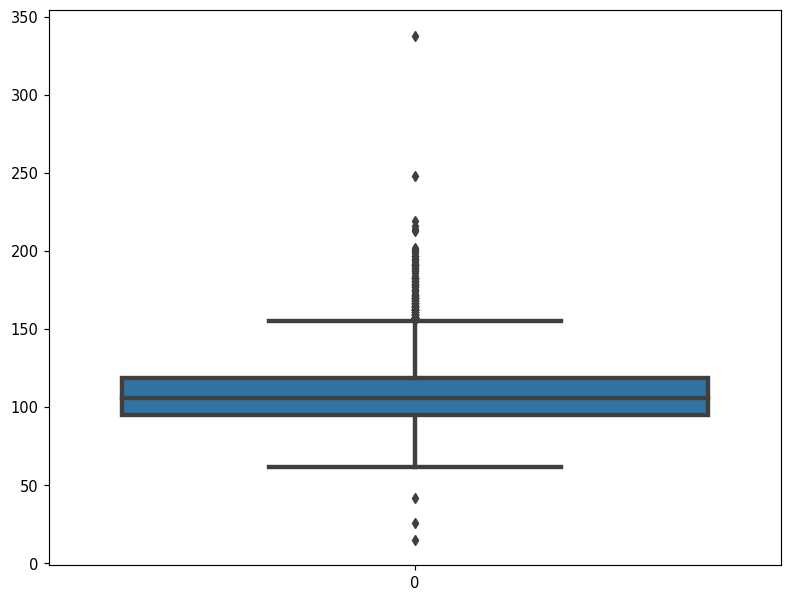

In [351]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(tmdb_data['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

In [352]:
#getting specific runtime 
tmdb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Thats amazing!! The plot generated above give a visual of complete distribution of runtime of movies by plotting the points againts their respective position in the ditribution

Coming to our first plot i.e. box-plot, It gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies. we also get the outliners her if you carefully observe the plot.

By looking at both the plot and calculations, we can conclude that..

1. 25% of movies have a runtime of less than 95 minutes
2. 50% of movies have a runtime of less than 109 minutes. (median)
3. 75% of movies have a runtime of less than 119 minutes

### Research Question 6 :  Which year saw the most number of successful movies?

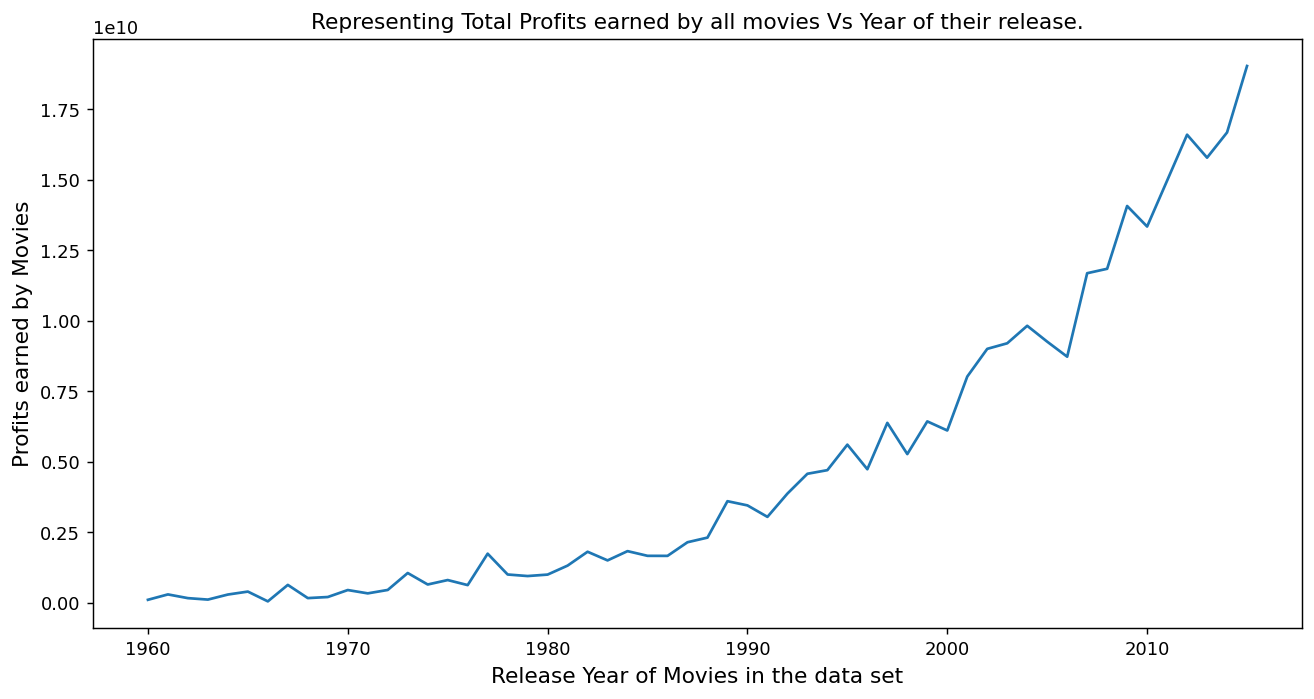

In [353]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = tmdb_data.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [354]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

Hence, we may infer mathematically and graphically that 2015 was the year when movies generated the most revenue.

We have finished analyzing the provided dataset.

Next, we'll look at traits of successful movies.

About the successful movies
We must once more purify our data before continuing. We will only take into consideration films that have generated a sizable profit.

Let's set this amount at $50 million.

In [355]:
#selecting the movies having profit $50M or more
profit_data = tmdb_data[tmdb_data['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [356]:
#counting the no.of rows in the new data base
len(profit_data)

1338

So our dataset is reduced to 1338 from 3853 (in earlier case)



### Research Question 7 : Popular genres (with respest to the profitable movies).

In [357]:
def data(column):
    # Combine all strings in the column separated by '|' into a single string
    data = profit_data[column].str.cat(sep='|')
    
    # Split the combined string into individual strings using '|' as a delimiter
    data = pd.Series(data.split('|'))
    
    # Count the frequency of each individual string and arrange them in descending order
    count = data.value_counts(ascending=False)
    
    return count

# Call the data() function with the 'genres' column and store the returned value in the 'count' variable
count = data('genres')

# Print the top 5 most frequent genres
print(count.head())

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64


Lets do a graphical analysis of the above collected data.

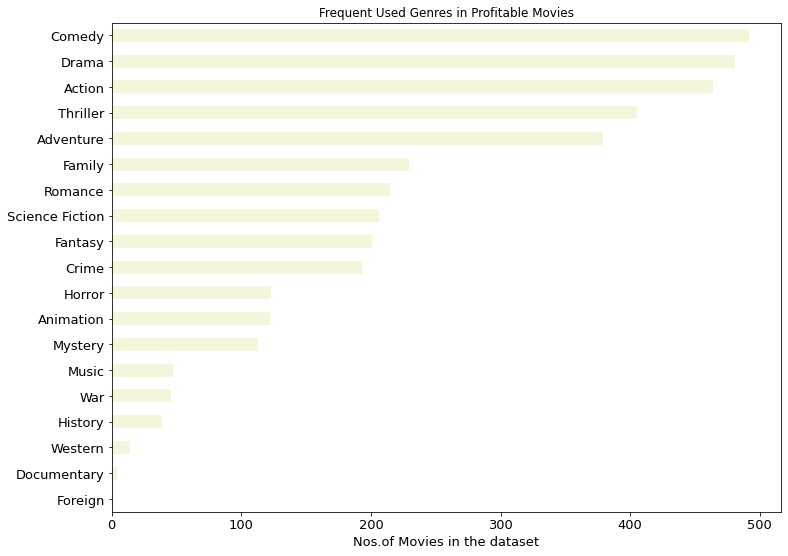

In [358]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = 'beige', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Research Question 8 : most popular cast (with respest to the profitable movies)


In [359]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Brad Pitt comes in second with 25 cast members, followed by Tom Hanks with 22 and Tom Cruise in first place with 27.

### Research Question 9 : average spending (with respest to the profitable movies)


In [360]:
def profit_avg(column):
    # Calculate the mean value of the column
    return profit_data[column].mean()

# Call the profit_avg() function with the 'budget' column and store the returned value in a variable
budget_avg = profit_avg('budget')

# Print the average budget
print('Average budget:', budget_avg)


Average budget: 60444957.76083707


Hence, the average budget for films with profits of $50 million or higher is $60 million.

### Research Question 10 : average income (with respest to the profitable movies)

In [361]:
# calling the above function for revenue
revenue_avg=profit_avg('revenue')
# Print the average revenue
print('Average revenue:', revenue_avg)

Average revenue: 254957662.59491777


As a result, the average revenue for films with profits of $50 million or more is $255 million.

### Research Question 11 : The average running time of the film (with respest to the profitable movies)

In [362]:
# calling the above function for 

runtime_avg = profit_avg('runtime')

# Print the average runtime
print('Average runtime:', runtime_avg)

Average runtime: 113.66741405082212


So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

<a id='conclusions'></a>
## Conclusions

This data analysis was quite intriguing. We discovered some pretty intriguing movie-related facts. This investigation leads us to the following conclusions:

In order for a movie to meet success criteria

There must be a 60 million dollar average budget.
The film must run for an average of 113 minutes.
Any of the following ought to be in the cast:
Tom Hanks, Sylvester Stallone, Cameron Diaz, Brad Pitt, and Tom Cruise
Action, Adventure, Thriller, Comedy, and Drama must be the genre.
By performing all of this, the film may become one of the hits and as a result, generate an estimated 255 million dollars in annual revenue.

Limitations: This analysis only took into account the films that brought in a profit of at least $50 million. This might not be entirely incorrect.
